In [1]:
!pip install scikit-learn==1.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 64.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
!pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285398 sha256=ee94c88681c5c1b012f04c0f8f1fc75b02df7869587e57bb8992fb6917b41750
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [3]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()


In [4]:
from google.colab import drive
drive.mount('/content/drive')
# base_path = "/content/drive/MyDrive/course_project/fraud_dataset.csv"
base_path = "/content/drive/MyDrive/Colab Notebooks/CS 6240/Project/Files/PS_20174392719_1491204439457_log.csv"

Mounted at /content/drive


In [5]:
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np
import random


# Create a SparkSession
spark = SparkSession.builder \
    .appName("BroadcastAndRunModels") \
    .getOrCreate()


In [6]:
df_all = pd.read_csv(base_path)

In [7]:
df_all.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
df_all.shape[0]

6362620

In [9]:
df_all.isnull().values.any()

False

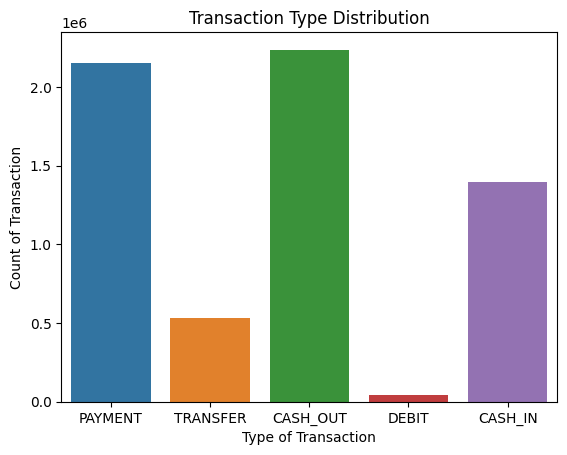

In [10]:
# df_all.type.value_counts()[df_all.type.unique()].plot(kind='bar', color=("red", "orange", "yellow", "green", "blue"))

import seaborn as sns
import matplotlib.pyplot as plt

# count plot on single categorical variable
plot = sns.countplot(x ='type', data = df_all)#
plot.set_title("Transaction Type Distribution")
plot.set_xlabel("Type of Transaction")
plot.set_ylabel("Count of Transaction")

# Show the plot
plt.show()

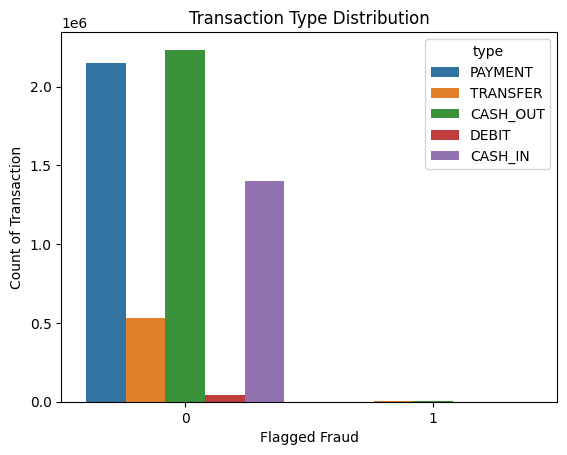

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# count plot on single categorical variable
plot = sns.countplot(x = "isFraud", hue ='type', data = df_all)#
plot.set_title("Transaction Type Distribution")
plot.set_xlabel("Flagged Fraud")
plot.set_ylabel("Count of Transaction")

# Show the plot
plt.show()

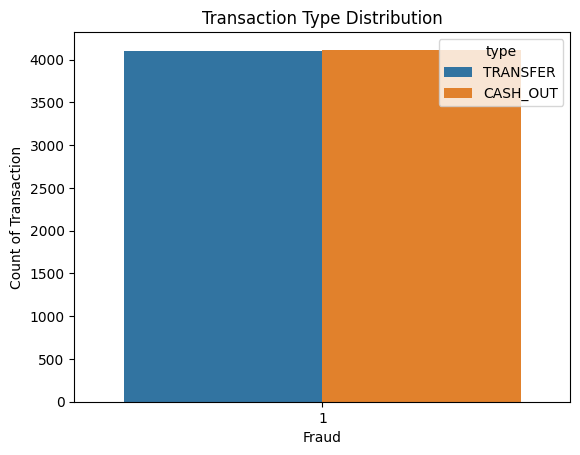

In [12]:
# Filter the dataframe to include only rows where isFraud is 1
df_fraud = df_all[df_all['isFraud'] == 1]

# count plot on single categorical variable
plot = sns.countplot(x = "isFraud", hue ='type', data = df_fraud)#
plot.set_title("Transaction Type Distribution")
plot.set_xlabel("Fraud")
plot.set_ylabel("Count of Transaction")

# Show the plot
plt.show()

In [13]:
df_fraud['type'].value_counts()

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

In [14]:
print(4116 + 4097)
print((4116 + 4097) / 6362620)

8213
0.001290820448180152
